<a href="https://colab.research.google.com/github/gishnum/naivebayes/blob/master/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.naive_bayes import MultinomialNB



In [0]:
url = 'https://raw.githubusercontent.com/gishnum/naive-bayes-/master/Cancer.csv?token=AKA6I5QZZZBHDZAUY6GPJBC45NXVC'

import pandas as pd
import numpy as np

df = pd.read_csv(url)

In [5]:
df.head()

,subjid,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,1,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,2,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,3,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,4,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,5,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [0]:

dum_cancer = pd.get_dummies(df, drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [0]:

X = dum_cancer.iloc[:,1:10]
y= dum_cancer.iloc[:,10]

In [8]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: tumor-size_15-19, dtype: uint8

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

multinomial = MultinomialNB()
multinomial.fit(X_train,y_train) # model building

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_probs = multinomial.predict_proba(X_test)
y_pred = multinomial.predict(X_test)

In [13]:
print(confusion_matrix(y_test,y_pred))


[[77  0]
 [ 9  0]]


In [14]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      1.00      0.94        77
           1       0.00      0.00      0.00         9

    accuracy                           0.90        86
   macro avg       0.45      0.50      0.47        86
weighted avg       0.80      0.90      0.85        86



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
print(accuracy_score(y_test,y_pred))

0.8953488372093024


In [20]:

from sklearn.metrics import roc_curve,roc_auc_score

y_pred_prob = y_probs[:,1]

print(y_pred_prob)

[0.05977736 0.17825408 0.17825408 0.12185681 0.083721   0.09040105
 0.10470382 0.17825408 0.10840216 0.10840216 0.09866728 0.12185681
 0.02861601 0.05085681 0.17825408 0.12185681 0.03252906 0.12185681
 0.04019492 0.03051184 0.17825408 0.12185681 0.03051184 0.09866728
 0.09866728 0.18814342 0.02861601 0.083721   0.10470382 0.18814342
 0.17825408 0.11495832 0.03252906 0.04282404 0.12185681 0.07878773
 0.083721   0.01421444 0.03051184 0.09866728 0.17825408 0.04280896
 0.03051184 0.04282404 0.04775913 0.10840216 0.04282404 0.1687765
 0.04282404 0.01517106 0.02861601 0.03252906 0.07878773 0.02861601
 0.083721   0.02861601 0.14088332 0.08893334 0.03252906 0.11495832
 0.12185681 0.02861601 0.02861601 0.03051184 0.1687765  0.1687765
 0.05616849 0.10840216 0.09866728 0.02861601 0.083721   0.03051184
 0.1687765  0.02861601 0.09294263 0.08893334 0.17825408 0.09040105
 0.10840216 0.10840216 0.03051184 0.09866728 0.1687765  0.17825408
 0.02861601 0.03051184]


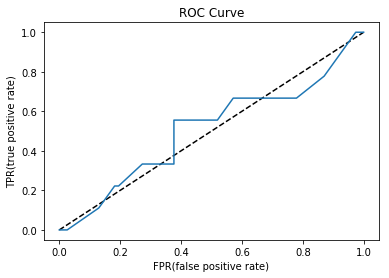

0.5072150072150071

In [23]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

import  matplotlib.pyplot as plt

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)

plt.xlabel('FPR(false positive rate)')
plt.ylabel('TPR(true positive rate)')
plt.title('ROC Curve')
plt.show()

roc_auc_score(y_test,y_pred_prob)

In [25]:
print(dum_cancer.head())

   subjid  deg-malig  ...  irradiat_yes  Class_recurrence-events
0       1          3  ...             0                        1
1       2          1  ...             0                        0
2       3          2  ...             0                        1
3       4          3  ...             1                        0
4       5          2  ...             0                        1

[5 rows x 33 columns]
